In [49]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [50]:
species = pd.read_csv("species_info.csv")
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [51]:
print("There are "+ str(len(species.scientific_name.unique()))+ " different species")

There are 5541 different species


In [52]:
print("There are " +str(len(species.category.unique()))+ " categories in species and they are {}".format(species.category.unique()))

There are 7 categories in species and they are ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [53]:
print("There are "+ str(len(species.conservation_status.unique()))+ " conservation status and they are {}".format(species.conservation_status.unique()))

There are 5 conservation status and they are [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [54]:
meet_criteria = species.groupby("conservation_status").scientific_name.count().reset_index()
meet_criteria = meet_criteria.rename(columns = {"censervation_status": "censervation_status", "scientific_name":"No that meet criteria"})
print(meet_criteria)

  conservation_status  No that meet criteria
0          Endangered                     16
1         In Recovery                      4
2  Species of Concern                    161
3          Threatened                     10


In [55]:
species.fillna("No Intervention", inplace =True)

In [56]:
gropus = species.groupby("conservation_status").scientific_name.count().reset_index()
gropus =gropus.rename(columns = {"censervation_status": "censervation_status", "scientific_name":"No that meet criteria"})
print(gropus)

  conservation_status  No that meet criteria
0          Endangered                     16
1         In Recovery                      4
2     No Intervention                   5633
3  Species of Concern                    161
4          Threatened                     10


In [57]:
protection_counts = species.groupby("conservation_status").scientific_name.nunique().reset_index().sort_values(by = "scientific_name", ascending = False)
print(protection_counts)

  conservation_status  scientific_name
2     No Intervention             5363
3  Species of Concern              151
0          Endangered               15
4          Threatened               10
1         In Recovery                4


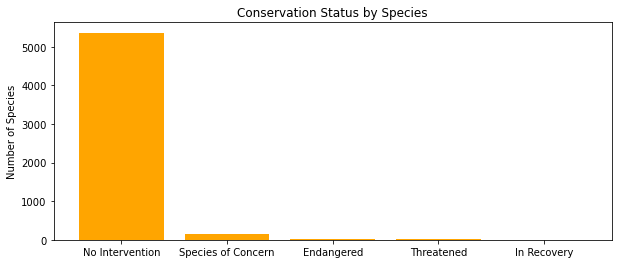

In [58]:
plt.figure(figsize = (10,4))
ax = plt.subplot()
plt.bar(range(len(protection_counts)), protection_counts.scientific_name, color = "orange")
ax.set_xticks(range(len(protection_counts)))
ax.set_xticklabels(protection_counts.conservation_status)
plt.ylabel("Number of Species")
plt.title("Conservation Status by Species")
plt.show()

In [59]:
species["is_protected"] = species.conservation_status.apply(lambda x: False if x=="No Intervention" else True)
species.head()

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False


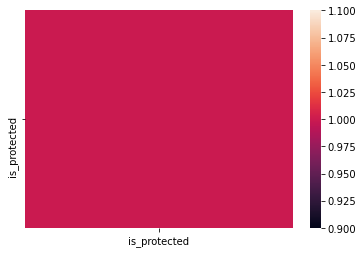

In [60]:
correlation = species.corr()
sns.heatmap(correlation)
plt.show()

In [61]:
category_counts = species.groupby(["category", "is_protected"]).scientific_name.nunique().reset_index()
print(category_counts)

             category  is_protected  scientific_name
0           Amphibian         False               72
1           Amphibian          True                7
2                Bird         False              413
3                Bird          True               75
4                Fish         False              115
5                Fish          True               11
6              Mammal         False              146
7              Mammal          True               30
8   Nonvascular Plant         False              328
9   Nonvascular Plant          True                5
10            Reptile         False               73
11            Reptile          True                5
12     Vascular Plant         False             4216
13     Vascular Plant          True               46


In [62]:
print(category_counts.head())

    category  is_protected  scientific_name
0  Amphibian         False               72
1  Amphibian          True                7
2       Bird         False              413
3       Bird          True               75
4       Fish         False              115


In [63]:
category_pivot = category_counts.pivot(columns = "is_protected", index = "category", values = "scientific_name").reset_index()

In [64]:
print(type(category_pivot))

<class 'pandas.core.frame.DataFrame'>


In [65]:
category_pivot = category_pivot.rename(columns = {"category":"category", False:"not_protected",True:"Protected"})
category_pivot.head()

is_protected,category,not_protected,Protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5


In [66]:
category_pivot["percent_protected[%]"] = (category_pivot.Protected *100)/((category_pivot.Protected)+(category_pivot.not_protected))
category_pivot

is_protected,category,not_protected,Protected,percent_protected[%]
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


In [67]:
contigency =[[30, 146],[75, 413]]
from scipy.stats import chi2_contingency
sad,pvalue,asdsad,sdasd = chi2_contingency(contigency)
print(pvalue)

0.6875948096661336


In [68]:
contigency1 = [[5, 73],[30, 146]]
sadas, pvalue, sdasd,asdasd = chi2_contingency(contigency1)
print(pvalue)

0.03835559022969898


In [69]:
observations = pd.read_csv("observations.csv")
print(observations.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


In [70]:
species["is_sheep"] = species.common_names.apply(lambda x: True if "Sheep" in x else False )

In [71]:
species[species.is_sheep]

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
1139,Vascular Plant,Rumex acetosella,"Sheep Sorrel, Sheep Sorrell",No Intervention,False,True
2233,Vascular Plant,Festuca filiformis,Fineleaf Sheep Fescue,No Intervention,False,True
3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
3758,Vascular Plant,Rumex acetosella,"Common Sheep Sorrel, Field Sorrel, Red Sorrel,...",No Intervention,False,True
3761,Vascular Plant,Rumex paucifolius,"Alpine Sheep Sorrel, Fewleaved Dock, Meadow Dock",No Intervention,False,True
4091,Vascular Plant,Carex illota,"Sheep Sedge, Smallhead Sedge",No Intervention,False,True
4383,Vascular Plant,Potentilla ovina var. ovina,Sheep Cinquefoil,No Intervention,False,True
4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True


In [72]:
sheep_species = species[(species.is_sheep) &(species.category =="Mammal")]

In [73]:
sheep_observations = observations.merge(sheep_species)

In [74]:
obs_by_park = sheep_observations.groupby("park_name").observations.sum().reset_index()
obs_by_park.head()

,park_name,observations
0,Bryce National Park,250
1,Great Smoky Mountains National Park,149
2,Yellowstone National Park,507
3,Yosemite National Park,282


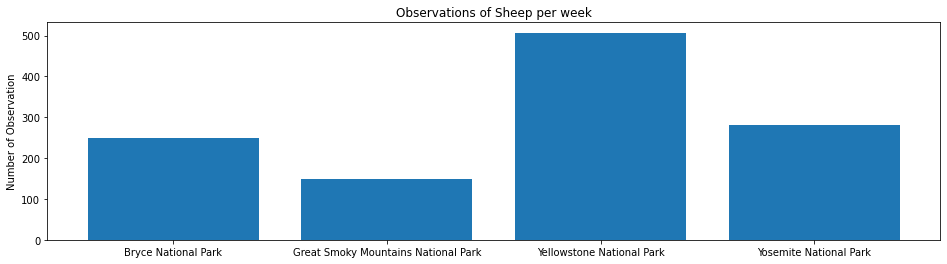

In [75]:
plt.figure(figsize = (16, 4))
ax = plt.subplot()
plt.bar(range(len(obs_by_park.observations)), obs_by_park.observations)
ax.set_xticks(range(len(obs_by_park.park_name)))
ax.set_xticklabels(obs_by_park.park_name)
plt.ylabel("Number of Observation")
plt.title("Observations of Sheep per week")
plt.show()

In [76]:
minimum_detectable_effect = 100 * 0.05 / 0.15
minimum_detectable_effect
baseline = 15
sample_size_per_variant = 870

In [77]:
bryce = 870 / 250.
yellowstone = 810 / 507.
bryce 

3.48